In [82]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
diabetes = pd.read_csv("diabetes.csv")

In [84]:
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
k = 49
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

In [87]:
y_pred = knn.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


Optimal value of k: 49
Maximum accuracy: 0.7532


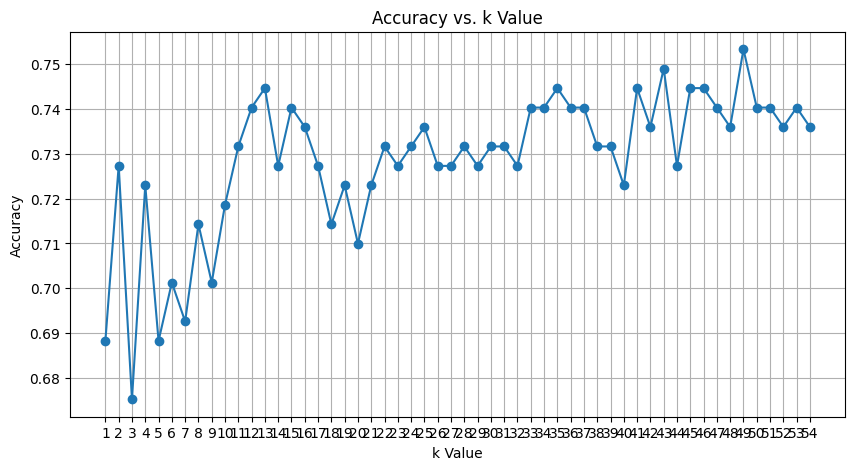

In [89]:

# List to store accuracy for each value of k
accuracies = []
k_values = range(1, 55)  # Testing k values from 1 to 20

# Loop over the range of k values
for k in k_values:
    # Initialize the k-NN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Find the optimal k value
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Print results
print(f"Optimal value of k: {optimal_k}")
print(f"Maximum accuracy: {max_accuracy:.4f}")

# Plot accuracy vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


In [90]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       151
           1       0.69      0.44      0.53        80

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[135  16]
 [ 45  35]]


<Axes: >

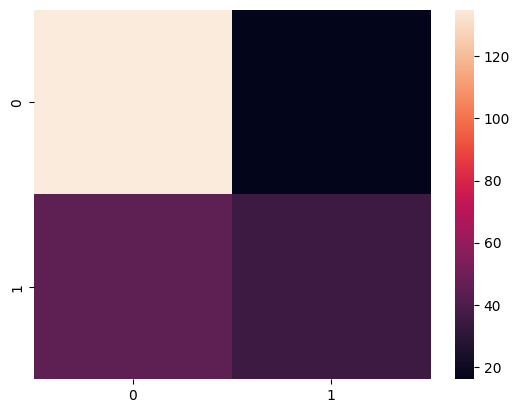

In [92]:
sns.heatmap(conf_matrix)